In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# GOAL:
- To make an accurate model that can accurately predict house price, given certain features. 

## Exploring the Dataset

In [2]:
# Better format display:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",1000)
pd.set_option("display.max_rows",None)

# Load csv as data frame
ds =  pd.read_csv("./data/Housing.csv")

# Displaying 
print("Columns:")
print(ds.columns + "\n")
print("First 5 Rows:")
print(ds.head(5))

Columns:
Index(['price\n', 'area\n', 'bedrooms\n', 'bathrooms\n', 'stories\n', 'mainroad\n', 'guestroom\n', 'basement\n', 'hotwaterheating\n', 'airconditioning\n', 'parking\n', 'prefarea\n', 'furnishingstatus\n'], dtype='object')
First 5 Rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
0  13300000  7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
1  12250000  8960         4          4        4      yes        no       no              no             yes        3       no        furnished
2  12250000  9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
3  12215000  7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished
4  11410000  7420         4          1   

### Numerical Features
- Price
- Area
- Bedrooms
- Bathrooms
- Stories
- Parking Spots

### Categorical Features
- Main Road
- Guest Room
- Basement 
- Hot Water Heater
- Prefarea (Prefered Area)
- Air Conditioner


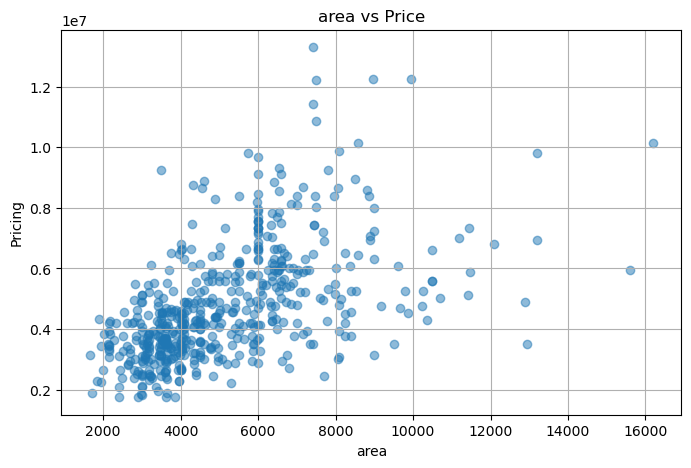

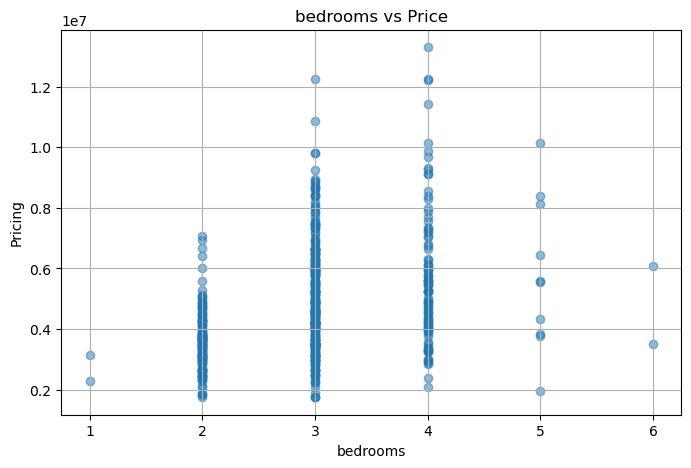

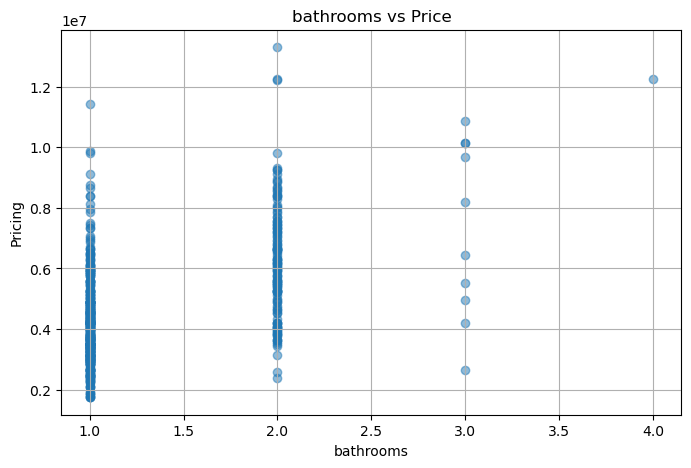

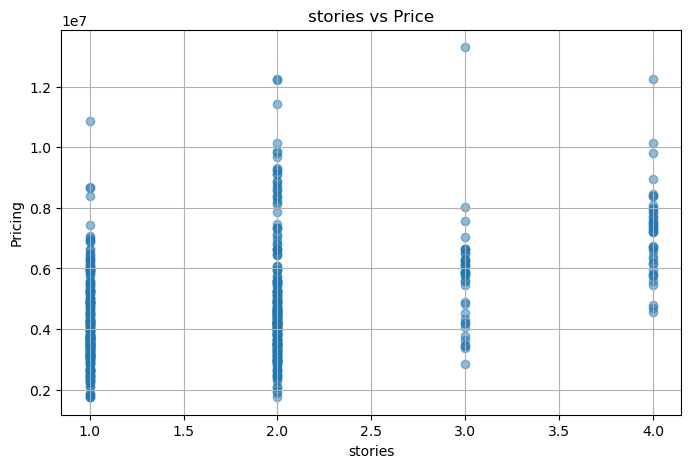

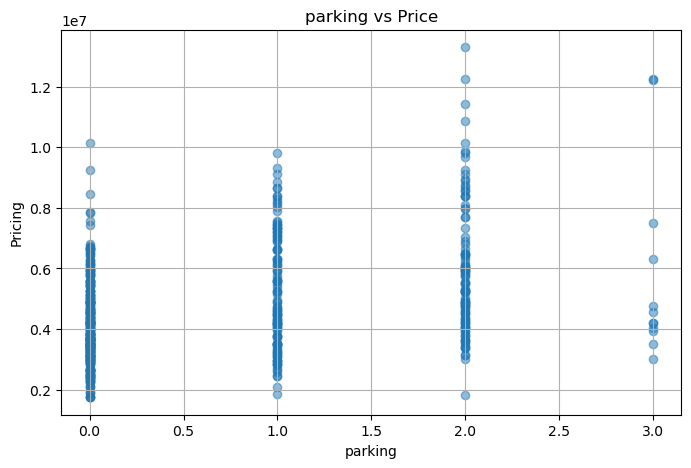

In [3]:
numerical_feature = ["area","bedrooms","bathrooms","stories","parking"]
categorical_feature = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","furnishingstatus"]
y = ds.iloc[:,0]
# Ploting numerical Feature
for feature in numerical_feature:
    plt.figure(figsize=(8,5))
    plt.scatter(ds[feature],y,alpha=0.5)
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Pricing")
    plt.grid(True)
    plt.show()

- noted we can somewhat see a positive trend as area increase so those prices.


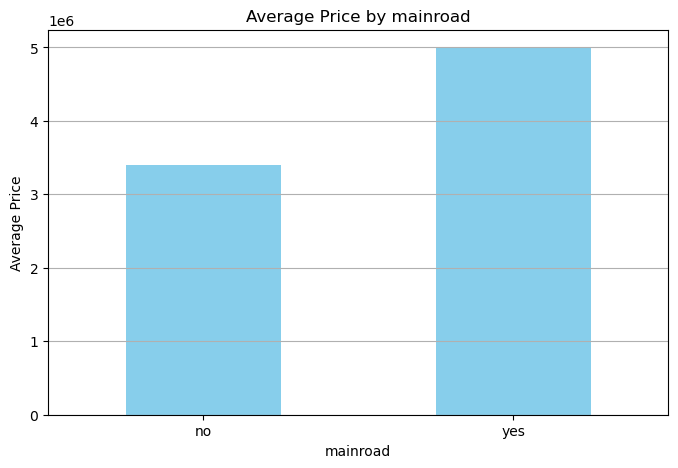

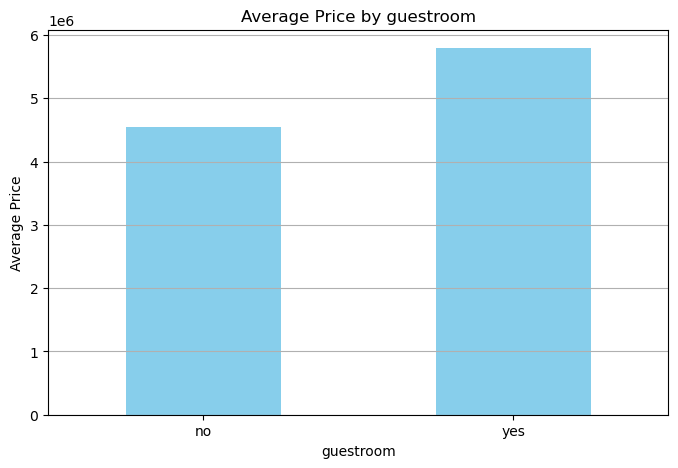

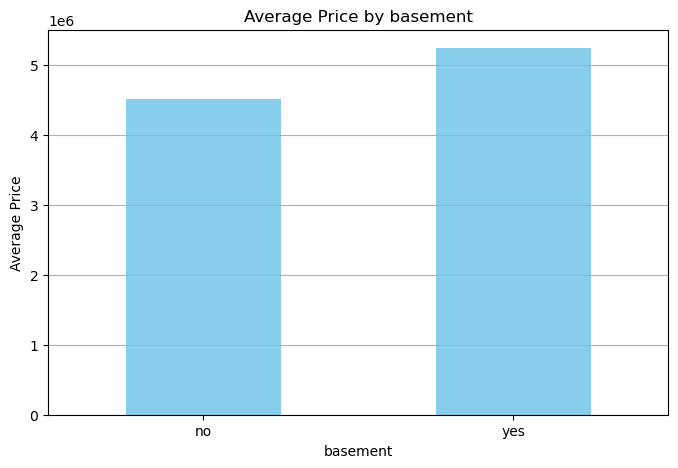

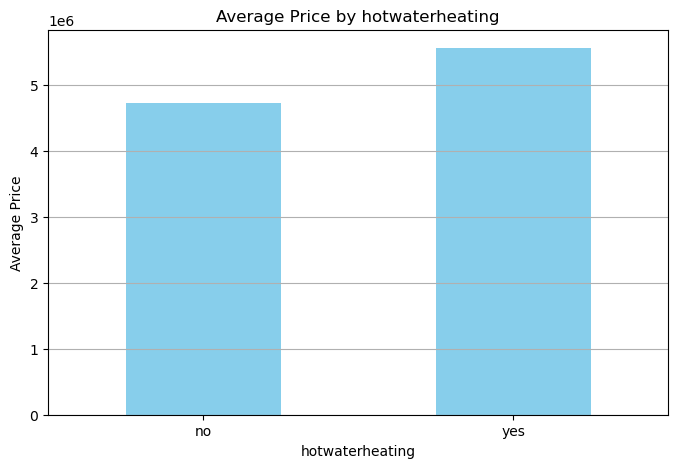

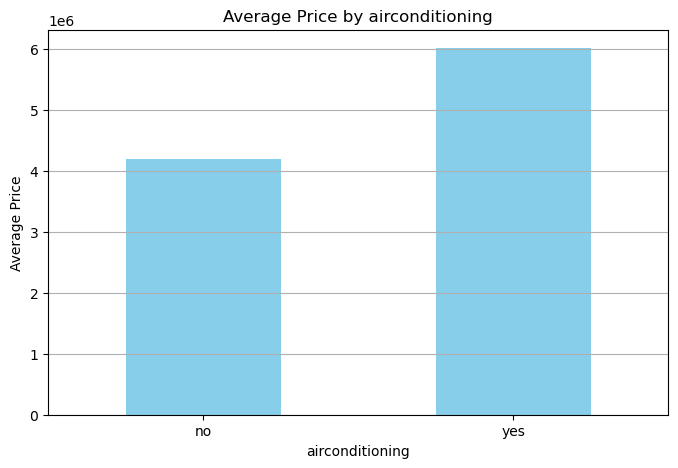

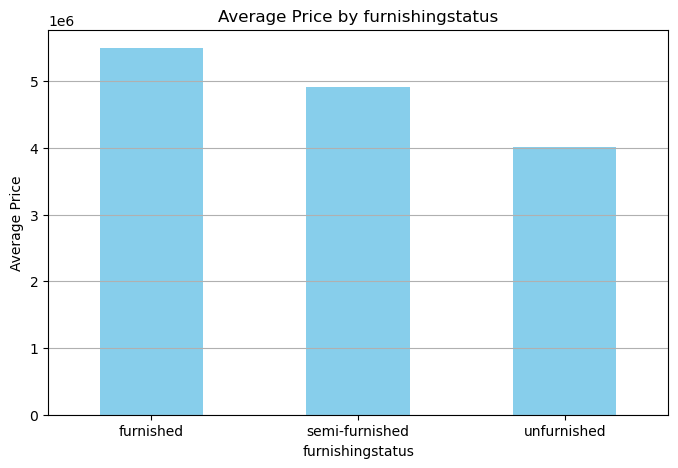

In [4]:
for column in categorical_feature:
    plt.figure(figsize=(8,5))
    grouped_data = ds.groupby(column)['price'].mean()
    grouped_data.plot(kind="bar", color="skyblue")
    plt.title(f"Average Price by {column}")
    plt.xlabel(column)
    plt.ylabel("Average Price")
    plt.xticks(rotation=0)
    plt.grid(axis="y")
    plt.show()

In [5]:
# Encoding Data set

from sklearn.preprocessing import LabelEncoder
print("Original values in furnishingstatus:")
print(ds['furnishingstatus'].unique())

le = LabelEncoder()
columns_to_encode = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
for column in columns_to_encode:
    ds[column] = le.fit_transform(ds[column])
print("Original values in furnishingstatus:")
print(ds['furnishingstatus'].unique())
ds.head(10)

Original values in furnishingstatus:
['furnished' 'semi-furnished' 'unfurnished']
Original values in furnishingstatus:
[0 1 2]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


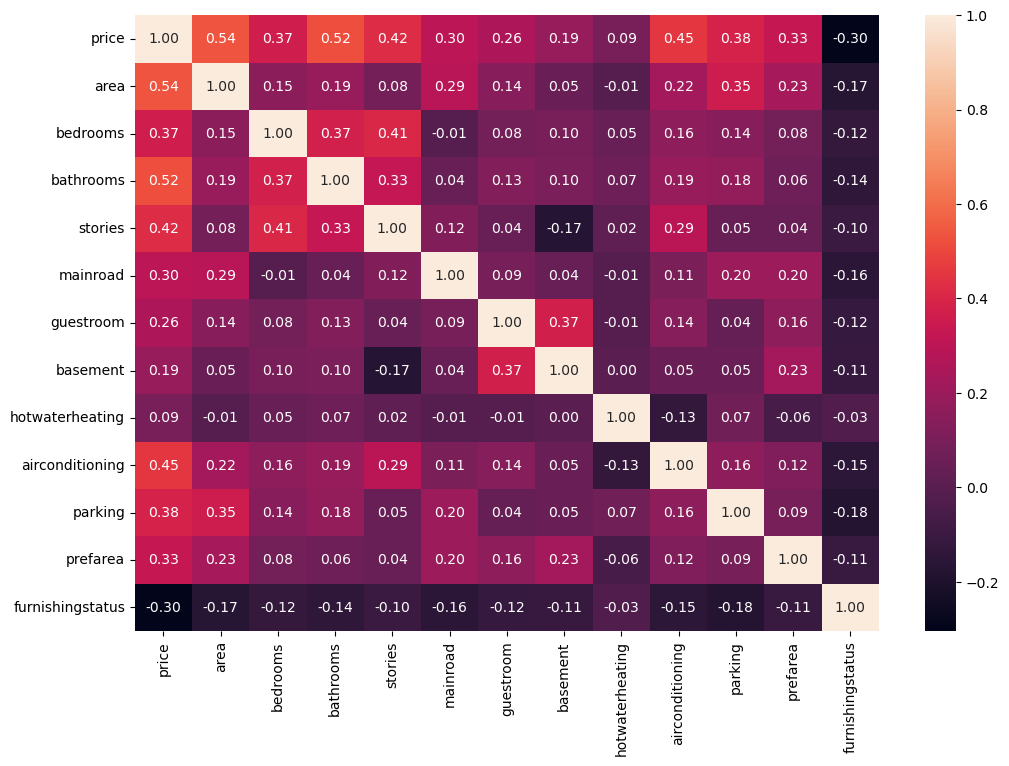

In [6]:
# Correlation 
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot=True, fmt=".2f")
plt.show()


- Moderate Positive correlation noted:
    - Price and Area
    - Price and Bathroom
    - Price and Stories
    - Price and Main Road
    - Price and Air Conditioning
    - Price and Parking
    - Price and Prefered Area
    - Area and Parking
    - Bedroom and Bathroom
    - Bedroom and Stories
    - Bathroom and Stories 
    - Guestroom and basement
- Moderate Negative correlation noted:
    - Price and Furnishing status, as furnish -> Semi -> None, price decreases


In [ ]:
correlation_matrix = ds.corr()
print(correlation_matrix["price"])
significant_price_feature = correlation_matrix["price"][abs(correlation_matrix["price"])>0.3]
print (significant_price_feature)

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64
